<a href="https://colab.research.google.com/github/Koruvika/Koruvika.github.io/blob/master/Gray2Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chuyển đổi ảnh xám sang ảnh màu

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

## Chuẩn bị dữ liệu

Sử dụng dữ liệu từ bộ dữ liệu cifar10, với đầu vào là các ảnh được xám hóa, và các ảnh màu gốc được dùng làm output.

In [2]:
(X_train, _), (X_test, _) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
color_train = X_train
color_test = X_test

In [4]:
gray_train = color_train @ np.array([0.2989, 0.5870, 0.1140])
gray_test = color_test  @ np.array([0.2989, 0.5870, 0.1140])

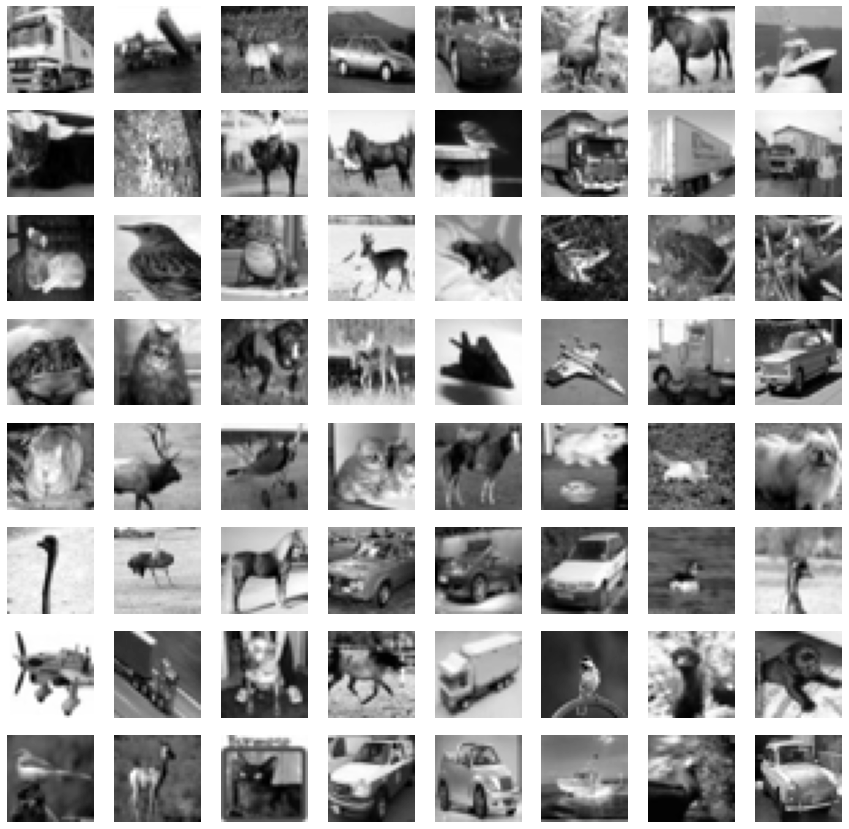

In [5]:
# dùng vẽ đồ thị, hình ảnh
import matplotlib.pyplot as plt 
import numpy as np  

# Tạo dang sách 9 phần tử ngẫu nhiên từ m_train có 50000 phần tử
indices = list(np.random.randint(10000, size=64))

fig =plt.figure(figsize=(15,15))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = gray_train[i]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img, cmap='gray')

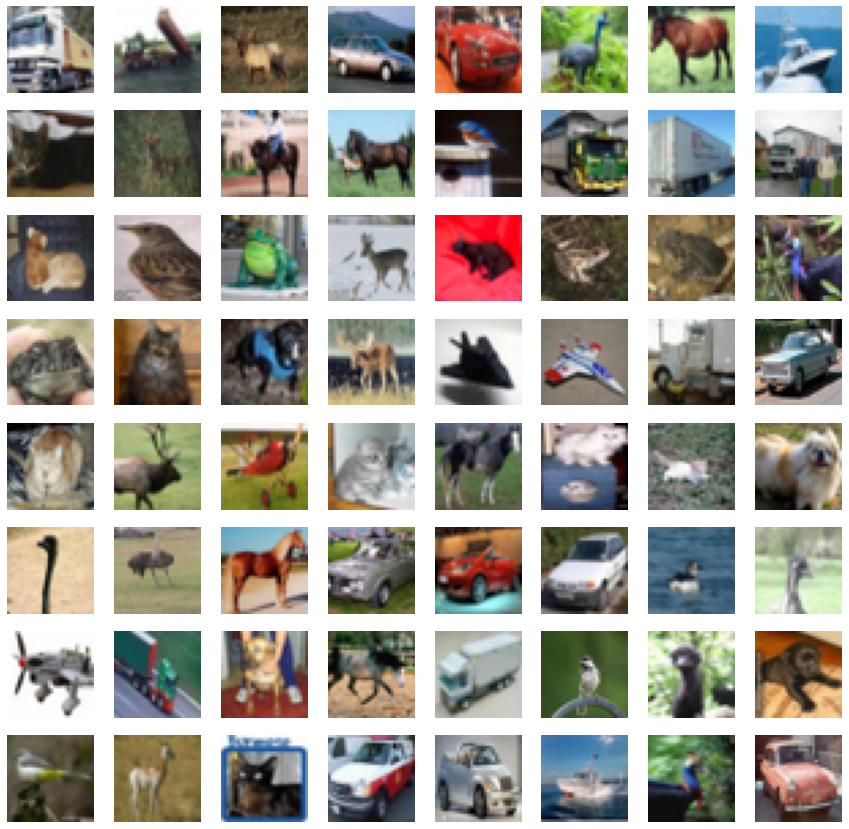

In [6]:
fig =plt.figure(figsize=(15,15))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = color_train[i]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img)

In [7]:
gray_train = gray_train / 255.0
gray_test = gray_test / 255.0
color_train = color_train / 255.0
color_test = color_test / 255.0

gray_test = gray_test.reshape(-1, 32, 32, 1)
gray_train = gray_train.reshape(-1, 32, 32, 1)

## Xây dựng mô hình
Sử dụng mạng CNN + BatchNormalization

In [8]:
from keras.layers import Dense, Conv2D, Concatenate, MaxPooling2D, BatchNormalization, Input, LeakyReLU

In [9]:
model = keras.models.Sequential([
    Input(shape=(32,32,1)),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    Conv2D(3, 1, padding='same', activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0

In [10]:
# train
optimizer = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['mean_absolute_error'])
history_data = model.fit(gray_train, color_train,
                         batch_size=512, epochs=10)

Epoch 1/10
98/98 [==============================] - 71s 611ms/step - loss: 0.0882 - mean_absolute_error: 0.0882
Epoch 2/10
98/98 [==============================] - 60s 609ms/step - loss: 0.0580 - mean_absolute_error: 0.0580
Epoch 3/10
98/98 [==============================] - 60s 610ms/step - loss: 0.0540 - mean_absolute_error: 0.0540
Epoch 4/10
98/98 [==============================] - 60s 611ms/step - loss: 0.0522 - mean_absolute_error: 0.0522
Epoch 5/10
98/98 [==============================] - 60s 610ms/step - loss: 0.0511 - mean_absolute_error: 0.0511
Epoch 6/10
98/98 [==============================] - 60s 616ms/step - loss: 0.0504 - mean_absolute_error: 0.0504
Epoch 7/10
98/98 [==============================] - 60s 614ms/step - loss: 0.0498 - mean_absolute_error: 0.0498
Epoch 8/10
98/98 [==============================] - 60s 616ms/step - loss: 0.0494 - mean_absolute_error: 0.0494
Epoch 9/10
98/98 [==============================] - 61s 621ms/step - loss: 0.0489 - mean_absolute_error:

In [12]:
color_pred = model.predict(gray_test)

In [13]:
color_pred.shape

(10000, 32, 32, 3)

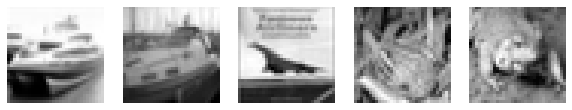

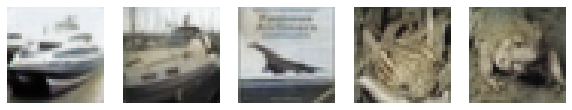

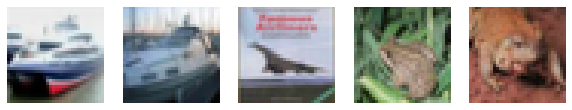

In [15]:

color_predicted = model.predict(gray_test)

columns = 5
rows = 1

fig = plt.figure(figsize=(10,5))  
for i in range(1, columns*rows +1):
    img = gray_test[i].reshape(32,32,1)
    fig.add_subplot(rows, columns, i)

    plt.axis('off')
    plt.imshow(img.reshape(32,32), cmap='gray')

fig = plt.figure(figsize=(10,5))  
for i in range(1, columns*rows +1):
    img = color_predicted[i].reshape(32,32,3)
    fig.add_subplot(rows, columns, i)

    plt.axis('off')
    plt.imshow(img)

fig = plt.figure(figsize=(10,5))  
for i in range(1, columns*rows +1):
    img = color_test[i].reshape(32,32,3)
    fig.add_subplot(rows, columns, i)

    plt.axis('off')
    plt.imshow(img)